# Seaborn

In [1]:
! pip install seaborn

In [3]:
# import matplotlib.pyplot as plt
# import numpy as np
import seaborn as sns

sns.set_style('whitegrid')

In [4]:
# 경고가 많이 뜨는 분 (warning과 error은 다르다)
import warnings
warnings.filterwarnings(action='ignore')

In [5]:
# seaborn이 갖고 있는 기본 데이터 셋 활용
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [5]:
tips.shape

(244, 7)

In [6]:
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [7]:
tips.index

RangeIndex(start=0, stop=244, step=1)

In [8]:
tips.describe

<bound method NDFrame.describe of      total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]>

<AxesSubplot:ylabel='tip'>

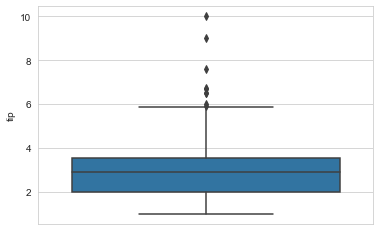

In [8]:
# sns.boxplot(y=tips["total_bill"])
sns.boxplot(y=tips["tip"])

<AxesSubplot:xlabel='day', ylabel='total_bill'>

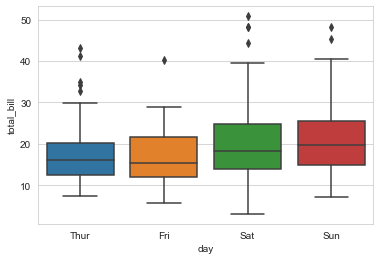

In [10]:
sns.boxplot(x="day", y="total_bill", data=tips) # 요일별 전체 금액에 대한 범위

<AxesSubplot:xlabel='day', ylabel='total_bill'>

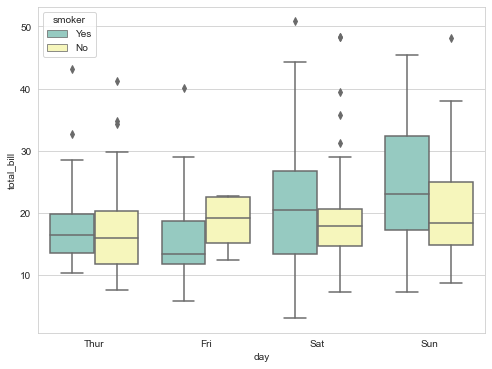

In [11]:
plt.figure(figsize=(8,6))
sns.boxplot(x="day", y="total_bill", hue="smoker", data=tips, palette="Set3")

<AxesSubplot:xlabel='day', ylabel='total_bill'>

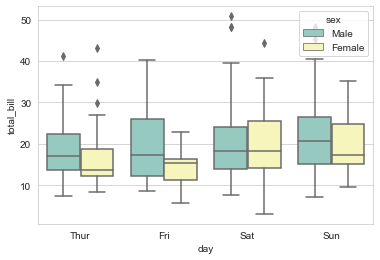

In [14]:
sns.boxplot(x="day", y="total_bill", hue="sex", data=tips, palette="Set3")

<AxesSubplot:xlabel='day', ylabel='total_bill'>

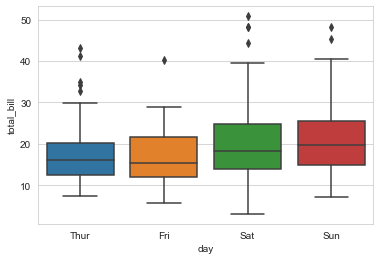

In [15]:
# boxplot으로 볼 때보다 하나하나의 데이터를 세밀하게 볼 수 있다는 장점
sns.boxplot(x='day', y='total_bill', data=tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

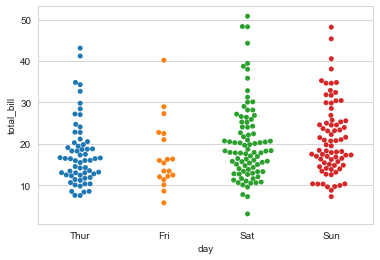

In [16]:
sns.swarmplot(x='day', y='total_bill', data=tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

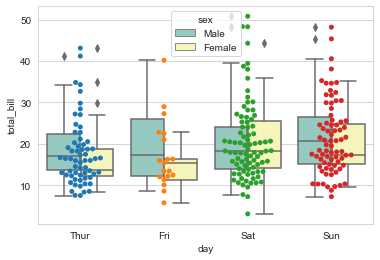

In [14]:
sns.boxplot(x="day", y="total_bill", hue="sex", data=tips, palette="Set3")
sns.swarmplot(x='day', y='total_bill', data=tips)

## Lmplot(Linear model plot)
- 컬럼들 간의 선형 관계를 확인할 수 있는 그래프 

*회귀분석(Regression Analysis)
- 독립변인이 종속변인에 영향을 미치는지 알아보고자 할 때 실시하는 분석방법.
- 독립변수 X(설명변수)에 대하여 종속변수 Y(반응변수)들 사이의 관계를 수학적 모형을 이용하여 규명하는 것


ex) 키와 몸무게는 상관관계가 있는가.

ex) 금액 많이 낸 테이블이 팁도 많이 내는가? => 전체 금액과 팁과의 상관관계

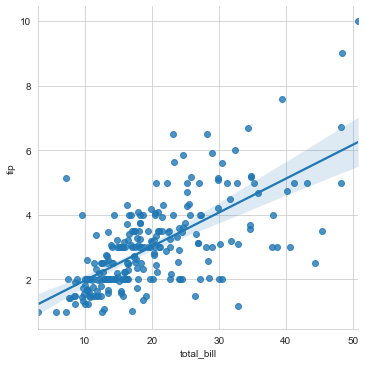

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

tips = sns.load_dataset("tips")
sns.lmplot(x="total_bill", y="tip", data=tips)

# 파란선이 회귀선

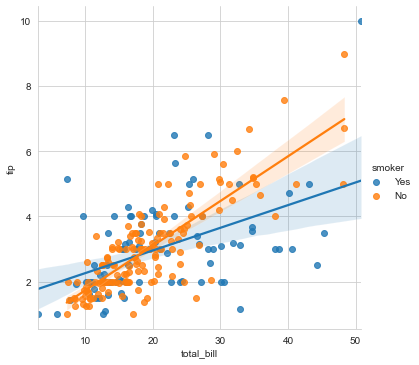

In [16]:
# 종속변수 즉 Y에 내가 궁금한 데이터 값을 준다.
# ex) 전체 금액 대비 팁은 얼마나 비율이 높은가. 전체 금액이 높으면 팁도 높을까?
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips)

# 'hue' 라는 속성에 정량적데이터(숫자)가 아닌 범주형데이터 ( yes or no )를 입력해 
# 그래프에 서로 다른 색깔로 표시되게 할 수 있습니다

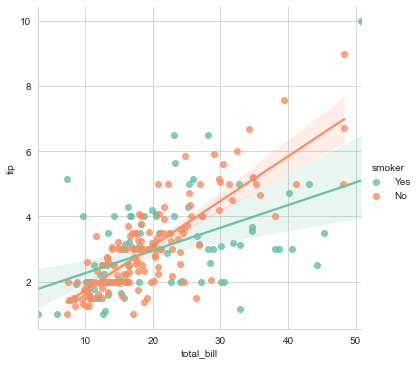

In [17]:
# seaborn, palette 옵션
# https://seaborn.pydata.org/tutorial/color_palettes.html



sns.lmplot(x="total_bill", y="tip", hue="smoker", palette="Set2", data=tips)

## 히트맵

<AxesSubplot:>

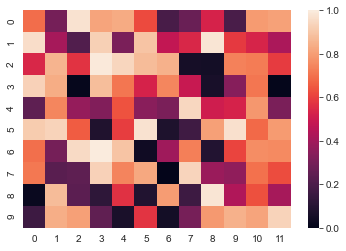

In [20]:
sns.heatmap(uniform_data, vmin=0, vmax=1)

In [21]:
# 비행기를 탄 승객수 데이터로 히트맵 그려보기
flights = sns.load_dataset('flights')

flights
flights.shape

(144, 3)

<AxesSubplot:xlabel='year', ylabel='month'>

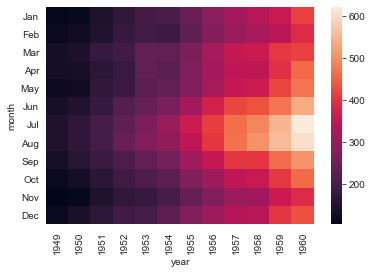

In [22]:
# pivot 함수
# 엑셀의 피벗테이블과 같은 기능
flights = flights.pivot("month", "year", "passengers")
sns.heatmap(flights)

Text(0.5, 1.0, 'Heatmap Flight Data')

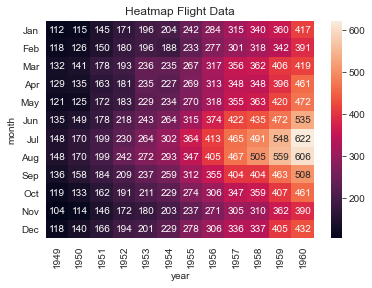

In [23]:
# 히트맵 각 데이터에 숫자 표시하는 옵션, annot
sns.heatmap(flights, annot=True, fmt="d") # fmt=format, d-> 정수
plt.title("Heatmap Flight Data")

# 연도가 늘어날 수록 비행기 탑승객이 늘어나고 있다.
# 1년 중 여름에 가장 많은 승객이 탑승하고 있다.

## pairplot
- 여러 변수 간의 산점도
- 각 컬럼(열)들의 모든 상관 관계를 출력

In [17]:
sns.set(style='ticks')
iris = sns.load_dataset('iris')
iris 
# iris.shape
# iris는 꽃의 한 종류. 꽃 잎, 꽃 받침 크기에 따른 종류(setosa, virginica..)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


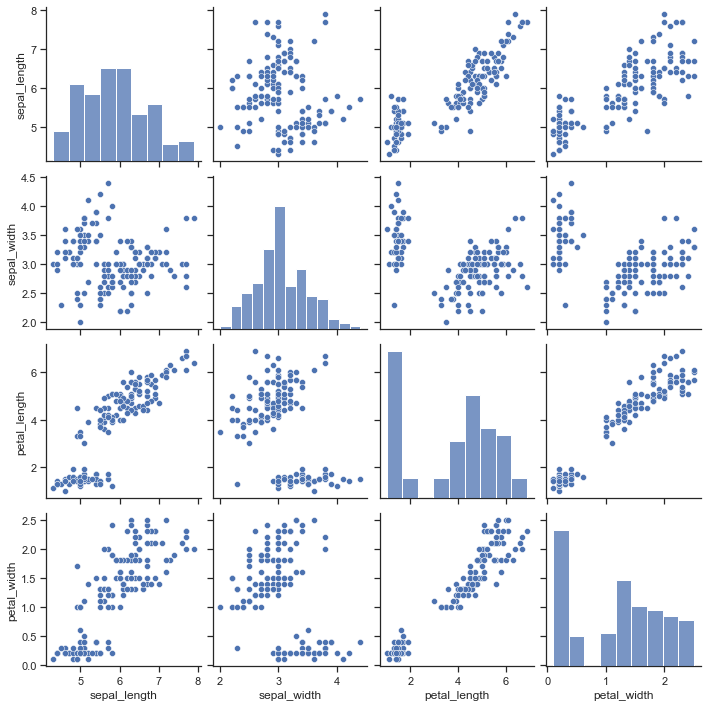

In [25]:
sns.pairplot(iris)

상관관계 (correlation)

- 어떤 연관성을 가진 두 개의 변량 x, y를 평면 위에 순서쌍(x, y)로 이루어진 그래프로 관계를 나타낸 것을 ‘상관도’라고 한다. 

- 상관도를 통해 나타낼 수 있는 상관관계는 양의 상관관계, 음의 상관관계, 상관관계가 없는 관계 이 3가지다. 


- 양의 상관관계: 두 변량 x와 y가 어떤 한 값이 커짐에 따라 다른 값도 같이 점차적으로 커지는 상관관계

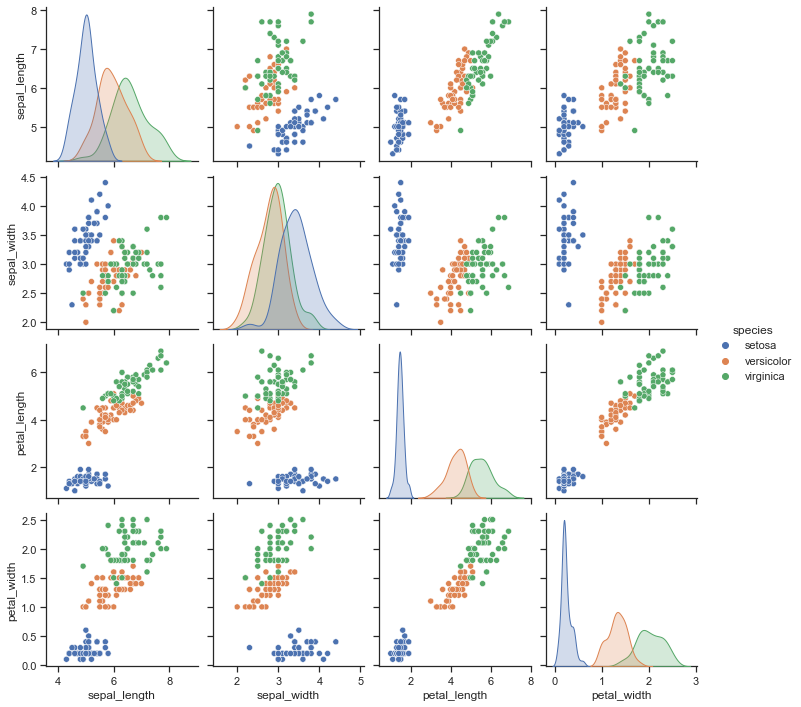

In [26]:
sns.pairplot(iris, hue="species") # 꽃의 종류 별로 표현

# Sepal Length:꽃받침의 길이 정보
# Sepal Width: 꽃받침의 너비 정보 
# Petal Length:꽃잎의 길이 정보 
# Petal Width:꽃잎의 너비 정보 

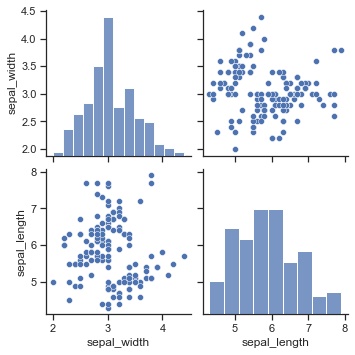

In [27]:
sns.pairplot(iris, vars=["sepal_width", "sepal_length"])

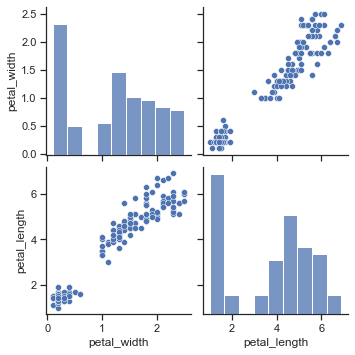

In [28]:
sns.pairplot(iris, vars=["petal_width", "petal_length"])

In [29]:
iris.corr() # correlation 상관관계를 숫자로 보여주는 함수.

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


## Folium
- 지도 시각화를 도와주는 도구

https://python-visualization.github.io/folium/quickstart.html

In [30]:
! pip install folium

In [18]:
import folium

In [23]:
folium.Map(location=[37.5488619, 127.1753687], zoom_start=15)